In [1]:
pip install GetOldTweets3


^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

deforma= pd.read_json('/content/tweets_defor.jsonl')

deforma

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Importing GetOldTweets3
import GetOldTweets3 as got
# Importing pandas
import pandas as pd

def get_tweets(search, startdate, enddate, maxtweet):
  tweetCriteria = got.manager.TweetCriteria().setQuerySearch(search)\
                                            .setSince(startdate)\
                                            .setUntil(enddate)\
                                            .setMaxTweets(maxtweet)\
                                            .setLang('es')
  tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    
  text_tweets = [[tw.username,
                tw.text,
                tw.date,
                tw.retweets,
                tw.favorites,
                tw.mentions,
                tw.hashtags,
                tw.geo] for tw in tweet] 
  df_state= pd.DataFrame(text_tweets, columns = ['User', 'Text', 'Date', 'Favorites', 'Retweets', 'Mentions','Hashtags', 'Geolocation'])
    
  return df_state


In [ ]:
df_1 = get_tweets('Coronavirus', "2020-01-01", "2020-08-12", 1000)
df_1

In [ ]:
# Importing GetOldTweets3
import GetOldTweets3 as got
# Importing pandas
import pandas as pd

def get_tweets_byuser(user, startdate, enddate, maxtweet):
  tweetCriteria = got.manager.TweetCriteria().setUsername(user)\
                                            .setSince(startdate)\
                                            .setUntil(enddate)\
                                            .setMaxTweets(maxtweet)\
                                            .setLang('es')
  tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    
  text_tweets = [[tw.username,
                tw.text,
                tw.date,
                tw.retweets,
                tw.favorites,
                tw.mentions,
                tw.hashtags,
                tw.geo] for tw in tweet] 
  df_state= pd.DataFrame(text_tweets, columns = ['User', 'Text', 'Date', 'Favorites', 'Retweets', 'Mentions','Hashtags', 'Geolocation'])
    
  return df_state

In [ ]:
df_train = get_tweets_byuser('eldeforma', "2020-01-01", "2020-08-12", 10000)
df_train

In [ ]:
df_train.to_csv('eldeforma_tweets.csv')

In [1]:
import pandas as pd
import numpy as np
import math

#Now everyone can replicate or results.
np.random.seed(200419)

tweetsok= pd.read_csv("full_neuron_testing.csv")
tweetsok.head()

,User,Text,Date,Favorites,Retweets,Mentions,Hashtags,Geolocation,Prediction
0,actualidadpanam,Vacuna rusa será vendida en sanandresitos. Ven...,2020-08-11 23:57:51+00:00,990,5057,NaN,NaN,NaN,1
1,actualidadpanam,Le ponen comparendo porque su permiso de movil...,2020-08-11 23:41:26+00:00,151,696,NaN,NaN,NaN,1
2,actualidadpanam,Película '¿Y dónde está el piloto?' predijo la...,2020-08-11 19:43:44+00:00,25,176,NaN,NaN,NaN,1
3,actualidadpanam,"Para marzo de 2021, primer piloto de felicidad.",2020-08-11 17:50:43+00:00,63,348,NaN,NaN,NaN,1
4,actualidadpanam,Con vuelos Engativá-Suba y Fontibón-Usaquén co...,2020-08-11 17:40:35+00:00,381,2180,NaN,NaN,NaN,1


In [2]:
def standarize_column_name(col):
    return col.lower().replace(' ','_').replace('/','_')

In [3]:
#Cleaning database
tweetsok.rename(columns={element: standarize_column_name(element) for element in
                         tweetsok.columns.values}, inplace=True)

tweetsok = tweetsok.replace(np.nan, '', regex=True)
tweetsok.head()


,user,text,date,favorites,retweets,mentions,hashtags,geolocation,prediction
0,actualidadpanam,Vacuna rusa será vendida en sanandresitos. Ven...,2020-08-11 23:57:51+00:00,990,5057,,,,1
1,actualidadpanam,Le ponen comparendo porque su permiso de movil...,2020-08-11 23:41:26+00:00,151,696,,,,1
2,actualidadpanam,Película '¿Y dónde está el piloto?' predijo la...,2020-08-11 19:43:44+00:00,25,176,,,,1
3,actualidadpanam,"Para marzo de 2021, primer piloto de felicidad.",2020-08-11 17:50:43+00:00,63,348,,,,1
4,actualidadpanam,Con vuelos Engativá-Suba y Fontibón-Usaquén co...,2020-08-11 17:40:35+00:00,381,2180,,,,1


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

# text and numeric classes that use sklearn base libaries
class TextTransformer(BaseEstimator, TransformerMixin):
    """
    Transform text features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None, *parg, **kwarg):
        return self

    def transform(self, X):
        return X[self.key]

class NumberTransformer(BaseEstimator, TransformerMixin):
    """
    Transform numeric features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


# Algoritmos
## Interpretación de las etiquetas

Etiqueta positiva: es la categoría que queremos predecir. Pare este caso si el tweet es una noticia falsa (Fake News).

Etiqueta negativa: el caso opuesto, es decir, la información es correcta.

*   True positives (TP): Nuestra predicción dijo que el Tweet es Fake news y la etiqueta real dice que SÍ es.
*   False positives (FP): Nuestra predicción dijo que el Tweet es Fake news y la etiqueta real dice que NO es.
*   True negatives (TN): Nuestra predicción dijo que el Tweet es legítimo y la etiqueta real dice que es Fake.
*   False negatvies (FN): Nuestra predicción dijo que el Tweet es legítimo y la etiqueta real dice que SÍ es legítimo.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion

# use the term-frequency inverse document frequency vectorizer to transform count of text
# into a weighed matrix of term importance
vec_tdidf = TfidfVectorizer(ngram_range=(1,2), analyzer='word', norm='l2')

# compile both the TextTransformer and TfidfVectorizer 
# to the text features
text = Pipeline([
                ('transformer', TextTransformer(key='text')),
                ('vectorizer', vec_tdidf)
                ])
mentions = Pipeline([
                ('transformer', TextTransformer(key='mentions')),
                ('vectorizer', vec_tdidf)
                ])
hashtags = Pipeline([
                ('transformer', TextTransformer(key='hashtags')),
                ('vectorizer', vec_tdidf)
                ])

# compile the NumberTransformer
# to the numeric features
favorites = Pipeline([
                ('transformer', NumberTransformer(key='favorites')),
                ])
retweets = Pipeline([
                ('transformer', NumberTransformer(key='retweets')),
                ])

# combine all of the features, text and numeric together
text_converted = FeatureUnion([('text', text),
                               ('mentions', mentions),
                               ('hashtags', hashtags),
                               ('favorites', favorites),
                               ('retweets', retweets)])


In [6]:

##Separate explicative and dependant variables
x= tweetsok[['text', 'mentions', 'hashtags', 'favorites', 'retweets']]
y= tweetsok.prediction

##Separate training and test.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=200419)

##Verify size
print("training x: {}, y: {}".format(x_train.shape,y_train.shape))
print("test x: {}, y: {}".format(x_test.shape,y_test.shape))

training x: (11080, 5), y: (11080,)
test x: (4749, 5), y: (4749,)


In [7]:
## Random Forest Configuration
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(oob_score=True, n_jobs=-1)

grid = {'rf__n_estimators': [300, 700,900], 'rf__min_samples_leaf': [2,3,5], 
       'rf__criterion':['gini','entropy']}

# unite the text_converted and classfier together
pipe = Pipeline([('text_converted', text_converted),
                 ('rf', rf)
                 ]) 

gs_rf = GridSearchCV(estimator = pipe, param_grid = grid, cv=3,verbose=1,
                     scoring='f1', return_train_score=True, n_jobs=-1)

start = time.time()
# RF training
gs_rf.fit(x_train, y_train)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.1min finished


tiempo de ejecución en segundos: 315.0666003227234


In [8]:
# Best estimator
rd_test= gs_rf.best_estimator_.named_steps["rf"]
rd_test

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                       oob_score=True)

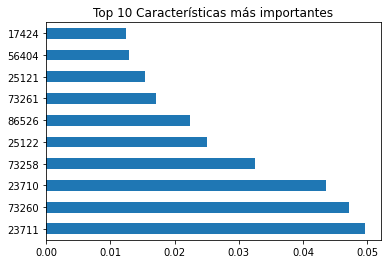

In [25]:
import matplotlib.pyplot as plt

feature_importances = gs_rf.best_estimator_.named_steps["rf"].feature_importances_

feat_importances = pd.Series(feature_importances).sort_values(ascending=False)
feat_importances.head(10).plot(kind='barh')
plt.title("Top 10 Características más importantes")
plt.show()

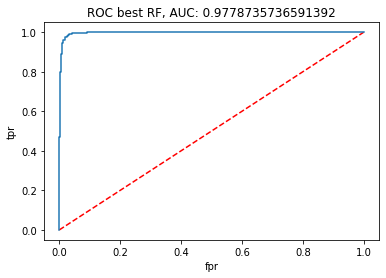

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions best estimator
predicted_labels = gs_rf.predict(x_test)

# Prediction scores best estimator
predicted_scores = gs_rf.predict_proba(x_test)

precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)

thresholds_2 = np.append(thresholds_2, 1)

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()


In [15]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [16]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report[metrics_report["fpr"]<=0.03]

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
36,0.492459,0.951165,0.987896,0.969183,0.987896,0.029197,0.970803,0.012104
37,0.494846,0.951002,0.984438,0.967431,0.984438,0.029197,0.970803,0.015562
38,0.496509,0.952062,0.984438,0.967980,0.984438,0.028534,0.971466,0.015562
39,0.498831,0.952009,0.983285,0.967394,0.983285,0.028534,0.971466,0.016715
40,0.500798,0.953605,0.983285,0.968218,0.983285,0.027538,0.972462,0.016715
...,...,...,...,...,...,...,...,...
161,0.813841,0.998514,0.387320,0.558140,0.387320,0.000332,0.999668,0.612680
162,0.814128,1.000000,0.387320,0.558371,0.387320,0.000000,1.000000,0.612680
163,0.920888,1.000000,0.041499,0.079690,0.041499,0.000000,1.000000,0.958501
164,0.920896,1.000000,0.040346,0.077562,0.040346,0.000000,1.000000,0.959654


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_labels)

array([[2931,   83],
       [  29, 1706]], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

threshold= metrics_report[metrics_report["fpr"]<=0.03]["threshold"].iloc[0]

y_pred_prob= gs_rf.predict_proba(x_test)[:,1]
    
# predict diabetes if the predicted probability is greater or equal than threshold
y_pred_prob[y_pred_prob >= threshold ] = 1
y_pred_prob[y_pred_prob < threshold ] = 0

confusion_matrix(y_test, y_pred_prob)

array([[2926,   88],
       [  21, 1714]], dtype=int64)